<h1 align='center'> 영상처리 프로그래밍 실습 2</h1>

<h6 align='right'> 2022. 3. 17.</h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   &nbsp;이은재&nbsp;          학번:    &nbsp;20185158&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 3월 23일 (수) 오후 6:00까지 최종본 SmartLEAD제출


In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
print("OpenCV version", cv2.__version__)

print("NumPy version", np.__version__)

OpenCV version 4.5.5
NumPy version 1.22.3


## 영상 읽기

### OpenCV의 imread() 로 읽기

#### PNG 파일 읽기

In [2]:
img_bird_png = cv2.imread('bird.png')
cv2.imread('bird.png')

array([[[109,  92, 103],
        [109,  92, 103],
        [109,  92, 103],
        ...,
        [ 88,  71,  75],
        [ 86,  69,  73],
        [ 81,  64,  68]],

       [[108,  92, 103],
        [108,  92, 103],
        [109,  93, 104],
        ...,
        [ 87,  70,  74],
        [ 86,  69,  73],
        [ 83,  66,  70]],

       [[109,  93, 104],
        [109,  93, 104],
        [109,  93, 104],
        ...,
        [ 86,  69,  73],
        [ 85,  68,  72],
        [ 86,  69,  73]],

       ...,

       [[ 92,  85, 120],
        [ 92,  85, 120],
        [ 92,  85, 120],
        ...,
        [104,  95, 115],
        [102,  93, 113],
        [100,  91, 111]],

       [[ 92,  85, 118],
        [ 92,  85, 118],
        [ 92,  85, 118],
        ...,
        [104,  95, 115],
        [103,  94, 114],
        [101,  92, 112]],

       [[ 92,  85, 118],
        [ 93,  86, 119],
        [ 93,  86, 119],
        ...,
        [103,  94, 114],
        [103,  94, 114],
        [103,  94, 114]]

####  영상 데이터의 속성 확인하기

In [11]:
type(img_bird_png) # ndarray : n-dimensional array(다차원 배열)

numpy.ndarray

In [12]:
img_bird_png.shape # tuple 425 : 세로방향의 픽셀 갯수 , 640 : 가로방향의 픽셀 갯수 , 3 : b,g,r (color component)

(425, 640, 3)

In [7]:
img_bird_png.dtype # 'uint8' : unsigned integer 8-bits (RGB는 24비트 필요)

dtype('uint8')

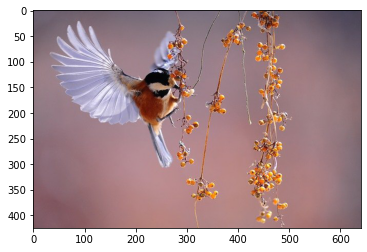

In [6]:
plt.imshow(img_bird_png[:,:,::-1])

- argument로 cv2.IMREAD_UNCHANGED 추가

In [3]:
help(cv2.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
    .   -   Portable Network Graphics - \*.png (see the *Note* section)
    .   -   WebP - \*.webp (see the *Note* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   PFM files - \*.pfm (see the *Note* section)
    .   -   

In [9]:
img_bird_png_u = cv2.imread('bird.png', cv2.IMREAD_UNCHANGED)

In [10]:
def print_array_attributes(img):
    print(f"shape: {img.shape}")
    print(f"dtype: {img.dtype}")
    print(f"min, max : {img.min()}, {img.max()}")
    

In [11]:
print_array_attributes(img_bird_png)

shape: (425, 640, 3)
dtype: uint8
min, max : 0, 255


In [13]:
print_array_attributes(img_bird_png_u) # BGRA - A(alpha) : 투명도

shape: (425, 640, 4)
dtype: uint8
min, max : 0, 255


#### PNG 파일을 JPEG 파일로 저장하기

In [17]:
cv2.imwrite('bird.jpg', img_bird_png_u)

True

#### JPEG 파일 읽기

In [18]:
file_name = 'bird.jpg'

- 영상 데이터의 속성 확인하기

In [19]:
img_bird_jpg = cv2.imread(file_name)

In [20]:
print_array_attributes(img_bird_jpg)

shape: (425, 640, 3)
dtype: uint8
min, max : 0, 255


In [24]:
img_bird_jpg_u = cv2.imread(file_name, cv2.IMREAD_UNCHANGED)

In [25]:
print_array_attributes(img_bird_jpg_u)

shape: (425, 640, 3)
dtype: uint8
min, max : 0, 255


#### JPEG 파일의 영상 데이터 배열의 컬러 채널이 3개뿐인 이유

**설명**:

In [ ]:
jpeg에서 alpha채널을 지원하지 않기 때문이다

### Matplotlib.image의 imread() 로 읽기

#### JPEG 파일 읽기

In [6]:
file_name = 'bird.jpg'


In [26]:
img_bird_jpg_mp = mpimg.imread(file_name)

In [27]:
print_array_attributes(img_bird_jpg_mp)

shape: (425, 640, 3)
dtype: uint8
min, max : 0, 255


In [32]:
img_bird_jpg[10,20] # BGR

array([112,  98, 110], dtype=uint8)

In [30]:
img_bird_jpg_mp[0,0] #RGB

array([103,  92, 108], dtype=uint8)

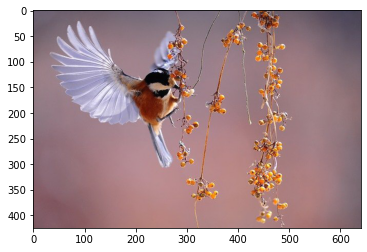

In [31]:
plt.imshow(img_bird_jpg_mp)

- 두 NumPy ndarray가 같은지 확인하기

In [33]:
img_bird_jpg[0,0,:] == img_bird_jpg_mp[0,0,::-1]

array([ True,  True,  True])

In [37]:
a = np.array([[1,2,3],[4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
b = np.array([[1,2,3],[4,5,6]])
a == b

array([[ True,  True,  True],
       [ True,  True,  True]])

In [43]:
a[1][2], a[1,2]

(6, 6)

In [52]:
a[1,::-1] ##::-1 배열을 역순으로

array([6, 5, 4])

#### PNG 파일 읽기

In [53]:
file_name = 'bird.png'

- 영상의 속성 확인하기

In [54]:
img_bird_png_mp = mpimg.imread(file_name)

In [56]:
print_array_attributes(img_bird_png_mp)

shape: (425, 640, 4)
dtype: float32
min, max : 0.0, 1.0


### List 객체의 데이터 복사하기



In [58]:
x = [1, 3, 5, 7, 9]
x

[1, 3, 5, 7, 9]

In [8]:
type(x)

list

- index를 통해서 개별 item에 접근
  - positive index: 0, 1, 2, 3, 4
  - negative index: -5, -4, -3, -2, -1

In [59]:
x[1], x[-4]

(3, 3)

- index slicing

In [61]:
x[:]

[1, 3, 5, 7, 9]

In [11]:
x[:3] #인덱스 0부터 3직전까지

[1, 3, 5]

In [12]:
x[1:]

[3, 5, 7, 9]

In [13]:
x[::2] #처음부터 끝까지 2씩 건너뜀

[1, 5, 9]

In [14]:
x[::-1] #역순

[9, 7, 5, 3, 1]

In [15]:
x[0] = 'str'
x

['str', 3, 5, 7, 9]

#### List 더하기

In [19]:
x, y

([1, 3, 5], [2, 4, 6])

In [62]:
x = [1, 3, 5]
y = [2, 4, 6]
x + y

[1, 3, 5, 2, 4, 6]

In [65]:
3 * x

[1, 3, 5, 1, 3, 5, 1, 3, 5]

### Nested list

In [68]:
x = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
x

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]

In [69]:
y = [[0,0,0,0,0], [0,0,0,0,0]]
y

[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

- x의 각 item에 10을 더해서 y의 대응하는 item에 할당하라

In [77]:
for n in range(5):
    for m in range(2):
        y[m][n] = x[m][n] + 10
y

[[11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]

### NumPy ndarray 복사하기

In [78]:
a1 = np.array([1, 3, 5])
a1

array([1, 3, 5])

In [79]:
a1.shape

(3,)

In [84]:
a1[1] = 5
a1

array([1, 5, 5])

In [85]:
a1[1] = 'str'

ValueError: invalid literal for int() with base 10: 'str'

In [86]:
a1[1] = 4.5
a1

array([1, 4, 5])

In [87]:
a1.dtype

dtype('int64')

In [89]:
a1[1] = -5
a1

array([ 1, -5,  5])

In [90]:
a2 = np.array([1,3,5], np.uint8)
a2

array([1, 3, 5], dtype=uint8)

unsigned integer 8-bit 데이터는 0부터 255(2&&8-1)까지의 정수만 표현

In [93]:
a2[0] = -1
a2

array([255,   3,   5], dtype=uint8)

**설명**: overflow와 underflow

### NumPy ndarray 배열 객체의 연산

In [94]:
a2 + a2

array([254,   6,  10], dtype=uint8)

### NumPy ndarray 배열 연산의 broadcasting

In [95]:
a2 + 2

array([1, 5, 7], dtype=uint8)

In [96]:
a2 * 3

array([253,   9,  15], dtype=uint8)

In [102]:
a3 = a2 / 2
a3.dtype

dtype('float64')

In [104]:
a4 = a2 // 2
a4.dtype

dtype('uint8')

In [105]:
a2

array([255,   3,   5], dtype=uint8)

In [107]:
a3

array([127.5,   1.5,   2.5])

In [106]:
a4

array([127,   1,   2], dtype=uint8)

### 영상 복사하기

1) OpenCV의 imread() 함수를 이용해서 tree-1.jpg 파일을 읽어서 ndarray를 img_tree_1 변수에 할당한다.

In [108]:
img_tree_1 = cv2.imread('tree-1.jpg')

2) img_tree_1을 복사할 빈 ndarray img를 만든다.

In [124]:
img_tree_1.shape

(426, 640, 3)

In [139]:
img = np.zeros(img_tree_1.shape, img_tree_1.dtype)

In [133]:
img = np.zeros_like(img_tree_1)

In [141]:
img = np.empty_like(img_tree_1)

3) img_tree_1의 모든 pixel을 img의 같은 위치에 복사한다.

In [143]:
img[:,:,:] = img_tree_1[:,:,:]

In [145]:
img = img_tree_1.copy() # O

In [148]:
img = img_tree_1 # X (img의 주소를 img_tree_1도 가지게 됨)

In [149]:
id(img)

140232193772112

In [150]:
id(img_tree_1)

140232193772112

In [157]:
a = [1,3,4]
b = a
a, b

([1, 3, 4], [1, 3, 4])

In [158]:
a[0] = 10
a,b

([10, 3, 4], [10, 3, 4])

In [159]:
a = [1,3,4]
b = a.copy()
a,b

([1, 3, 4], [1, 3, 4])

In [160]:
a[0] = 10
a,b

([10, 3, 4], [1, 3, 4])

### weighted sum of two images

$$g(x,y) = \alpha f_1(x,y) + (1-\alpha )f_2(x,y), \;\; 0 \le \alpha \le 1$$

In [3]:
img_tree_1 = cv2.imread('tree-1.jpg')
img_tree_2 = cv2.imread('tree-2.jpg')
img_tree_3 = cv2.imread('tree-3.jpg')
img_tree_4 = cv2.imread('tree-4.jpg')

In [19]:
alpha = 0.5
img_tree = (img_tree_1 * alpha + img_tree_4 * (1-alpha)).astype(np.uint8)
cv2.imshow('Tree images',img_tree)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
for alpha in np.arange(1,-0.1, -0.1):
    img_tree = (img_tree_1 * alpha + img_tree_4 * (1-alpha)).astype(np.uint8)
    cv2.imshow('Tree images',img_tree)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## 문제 1.

가중치 $\alpha$를 1부터 0까지 0.01 간격으로 변경해 가면서, 두 영상의 weighted sum을 구하고 화면에 표시하는 프로그램을 작성하라.

영상의 순서는 tree-1 -> tree-2 --> tree-3 -->tree4 --> tree-1
단, 영상과 영상 사이의 디스플레이 간격은 0.5초로 설정하라.


In [5]:
img_trees = [img_tree_1, img_tree_2, img_tree_3, img_tree_4, img_tree_1]
for i in range(1,5):
    for alpha in np.arange(1, 0, -0.01):
        img_tree = (img_trees[i-1] * alpha + img_trees[i] * (1-alpha)).astype(np.uint8)
        cv2.imshow('Tree images', img_tree)
        cv2.waitKey(500)
cv2.destroyAllWindows()
